In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["not_interested", "interested"]

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
data = pd.concat([train,test],axis=0,sort=True)

In [7]:
data.head()

,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,73,1045696,X3,No,Female,NNVBBKZB,No,0.0,Other,RG268,43
1,30,581988,X1,No,Female,IDD62UNG,No,0.0,Salaried,RG277,32
2,56,1484315,X3,No,Female,HD3DSEMC,Yes,0.0,Self_Employed,RG268,26
3,34,470454,X1,No,Male,BF3NC7KV,No,0.0,Salaried,RG270,19
4,30,886787,X1,No,Female,TEASRWXV,No,0.0,Salaried,RG282,33


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351037 entries, 0 to 105311
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  351037 non-null  int64  
 1   Avg_Account_Balance  351037 non-null  int64  
 2   Channel_Code         351037 non-null  object 
 3   Credit_Product       309190 non-null  object 
 4   Gender               351037 non-null  object 
 5   ID                   351037 non-null  object 
 6   Is_Active            351037 non-null  object 
 7   Is_Lead              245725 non-null  float64
 8   Occupation           351037 non-null  object 
 9   Region_Code          351037 non-null  object 
 10  Vintage              351037 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 32.1+ MB


In [9]:
data.isnull().sum()

Age                         0
Avg_Account_Balance         0
Channel_Code                0
Credit_Product          41847
Gender                      0
ID                          0
Is_Active                   0
Is_Lead                105312
Occupation                  0
Region_Code                 0
Vintage                     0
dtype: int64

<AxesSubplot:>

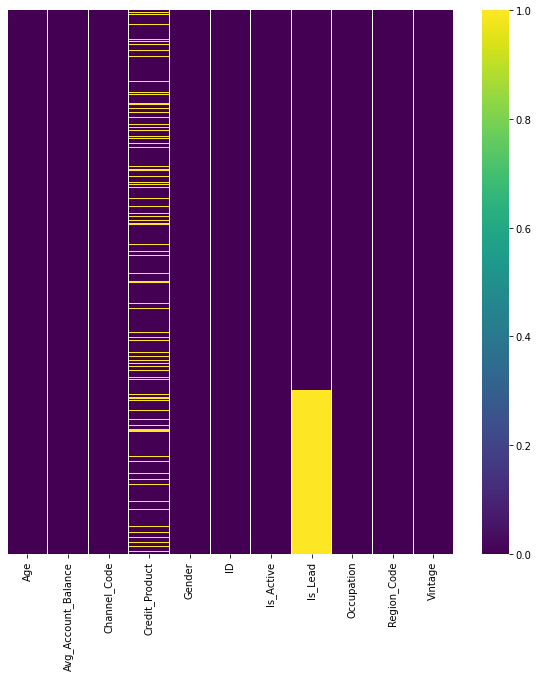

In [10]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [11]:
data.columns

Index(['Age', 'Avg_Account_Balance', 'Channel_Code', 'Credit_Product',
       'Gender', 'ID', 'Is_Active', 'Is_Lead', 'Occupation', 'Region_Code',
       'Vintage'],
      dtype='object')

In [12]:
data.drop('Credit_Product',axis = 1, inplace=True)

<AxesSubplot:>

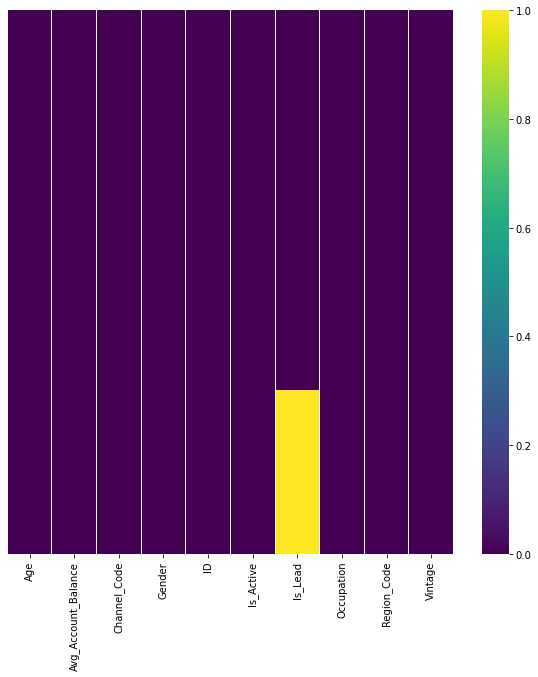

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [14]:
data.corr()

,Age,Avg_Account_Balance,Is_Lead,Vintage
Age,1.000000,0.142563,0.230814,0.628558
Avg_Account_Balance,0.142563,1.000000,0.053370,0.166611
Is_Lead,0.230814,0.053370,1.000000,0.279642
Vintage,0.628558,0.166611,0.279642,1.000000


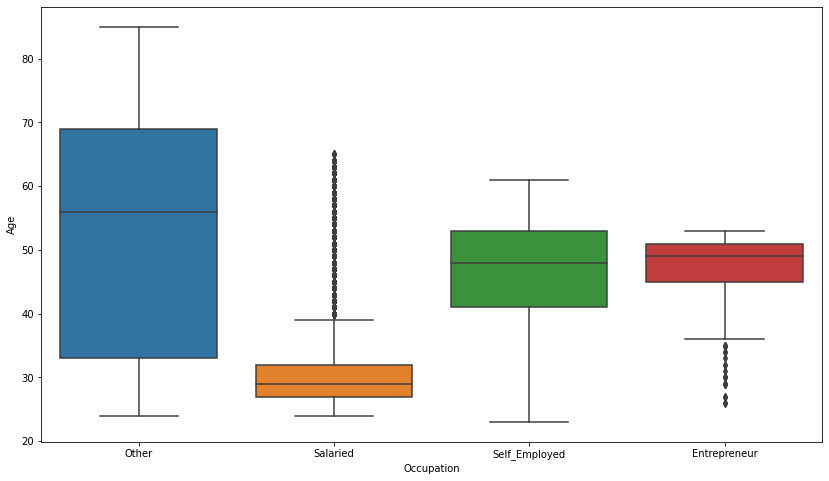

In [15]:
sns.boxplot(x="Occupation",y="Age",data=data)
plt.show()

C:\Users\s_the_king\anaconda31\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

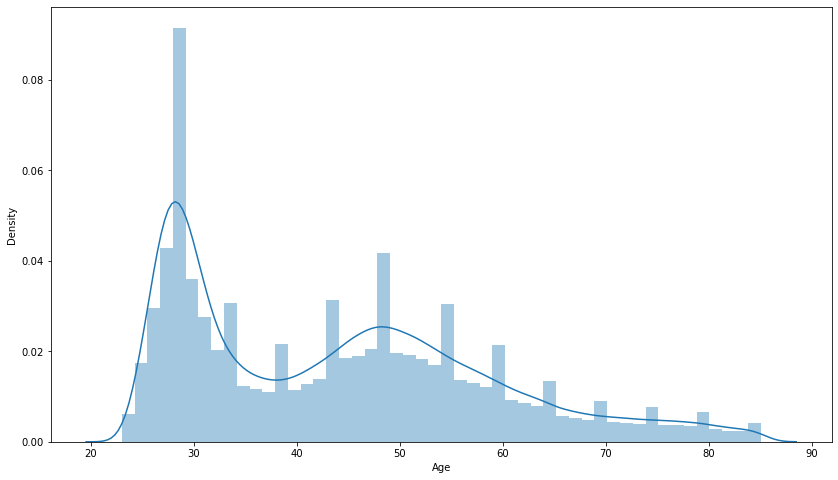

In [16]:
sns.distplot(data['Age'])

In [17]:
data['Age'].isnull().sum()

0

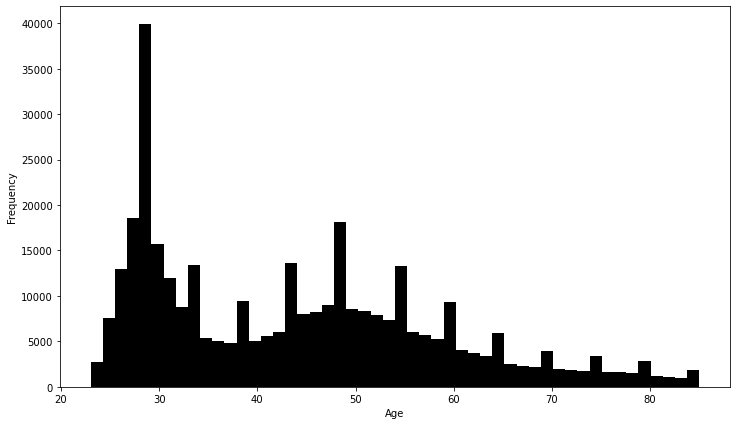

In [18]:
plt.figure(figsize=(12,7))
plt.xlabel("Age")
data["Age"].plot(kind="hist",bins=50,color="k")
plt.show()

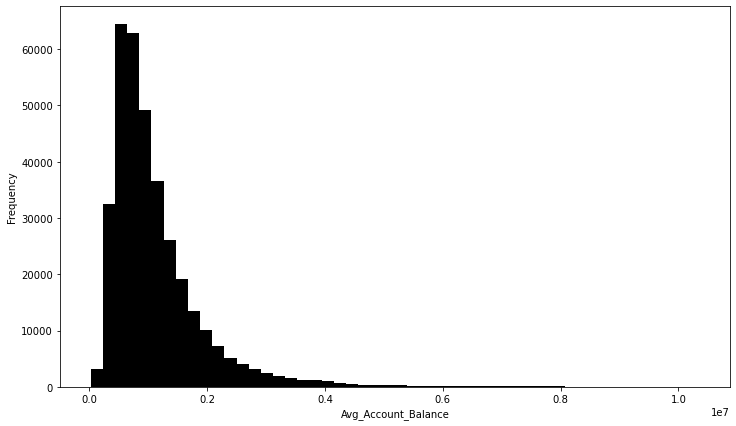

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Avg_Account_Balance")
data["Avg_Account_Balance"].plot(kind="hist",bins=50,color="k")
plt.show()

In [20]:
data.loc[ data['Avg_Account_Balance'] <= 1000000, 'Avg_Account_Balance'] = 0
data.loc[(data['Avg_Account_Balance'] > 1000000) & (data['Avg_Account_Balance'] <= 2000000), 'Avg_Account_Balance'] = 1
data.loc[(data['Avg_Account_Balance'] > 2000000) & (data['Avg_Account_Balance'] <= 4000000), 'Avg_Account_Balance']   = 2
data.loc[ data['Avg_Account_Balance'] > 4000000, 'Avg_Account_Balance'] = 3
data['Avg_Account_Balance'] = data['Avg_Account_Balance'].astype(int)

data.loc[ data['Age'] <= 20, 'Age'] = 0
data.loc[(data['Age'] > 20) & (data['Age'] <= 40), 'Age'] = 1
data.loc[(data['Age'] > 40) & (data['Age'] <= 60), 'Age'] = 2
data.loc[(data['Age'] > 60) & (data['Age'] <= 80), 'Age'] = 3
data.loc[ data['Age'] > 80, 'Age'] = 4 ;

In [21]:
data.head()

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,3,1,X3,Female,NNVBBKZB,No,0.0,Other,RG268,43
1,1,0,X1,Female,IDD62UNG,No,0.0,Salaried,RG277,32
2,2,1,X3,Female,HD3DSEMC,Yes,0.0,Self_Employed,RG268,26
3,1,0,X1,Male,BF3NC7KV,No,0.0,Salaried,RG270,19
4,1,0,X1,Female,TEASRWXV,No,0.0,Salaried,RG282,33


In [22]:
data["Is_Active"]=data["Is_Active"].map({"Yes":1,"No":0})

In [23]:
data

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,3,1,X3,Female,NNVBBKZB,0,0.0,Other,RG268,43
1,1,0,X1,Female,IDD62UNG,0,0.0,Salaried,RG277,32
2,2,1,X3,Female,HD3DSEMC,1,0.0,Self_Employed,RG268,26
3,1,0,X1,Male,BF3NC7KV,0,0.0,Salaried,RG270,19
4,1,0,X1,Female,TEASRWXV,0,0.0,Salaried,RG282,33
...,...,...,...,...,...,...,...,...,...,...
105307,2,3,X2,Male,DBENJOYI,1,NaN,Salaried,RG268,86
105308,2,1,X2,Male,CWQ72DWS,0,NaN,Other,RG277,86
105309,1,1,X4,Male,HDESC8GU,0,NaN,Salaried,RG254,15
105310,2,0,X3,Male,2PW4SFCA,1,NaN,Other,RG254,93


In [24]:
data['Gender'] = data['Gender'].map({"Male":0, "Female":1})

In [25]:
data.head()

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,3,1,X3,1,NNVBBKZB,0,0.0,Other,RG268,43
1,1,0,X1,1,IDD62UNG,0,0.0,Salaried,RG277,32
2,2,1,X3,1,HD3DSEMC,1,0.0,Self_Employed,RG268,26
3,1,0,X1,0,BF3NC7KV,0,0.0,Salaried,RG270,19
4,1,0,X1,1,TEASRWXV,0,0.0,Salaried,RG282,33


In [26]:
data['Channel_Code'] = data['Channel_Code'].map({'X1':0,'X2':1,'X3':2,'X4':3})

In [27]:
data.head()

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,3,1,2,1,NNVBBKZB,0,0.0,Other,RG268,43
1,1,0,0,1,IDD62UNG,0,0.0,Salaried,RG277,32
2,2,1,2,1,HD3DSEMC,1,0.0,Self_Employed,RG268,26
3,1,0,0,0,BF3NC7KV,0,0.0,Salaried,RG270,19
4,1,0,0,1,TEASRWXV,0,0.0,Salaried,RG282,33


In [28]:
data['Occupation'] = data['Occupation'].map({'Other':0, 'Salaried':1, 'Self_Employed':2, 'Entrepreneur':3})

In [29]:
data.head()

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,3,1,2,1,NNVBBKZB,0,0.0,0,RG268,43
1,1,0,0,1,IDD62UNG,0,0.0,1,RG277,32
2,2,1,2,1,HD3DSEMC,1,0.0,2,RG268,26
3,1,0,0,0,BF3NC7KV,0,0.0,1,RG270,19
4,1,0,0,1,TEASRWXV,0,0.0,1,RG282,33


In [30]:
data['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [31]:
data['Region_Code'] = data['Region_Code'].map({'RG268':0, 'RG277':1, 'RG270':2, 'RG282':3, 'RG261':4, 'RG265':5, 'RG283':6,
       'RG254':7, 'RG269':8, 'RG257':9, 'RG279':10, 'RG280':11, 'RG252':12, 'RG284':13,
       'RG259':14, 'RG281':15, 'RG258':16, 'RG266':17, 'RG260':18, 'RG274':19, 'RG256':20,
       'RG275':21, 'RG273':22, 'RG267':23, 'RG272':24, 'RG251':25, 'RG262':26, 'RG264':27,
       'RG278':28, 'RG276':29, 'RG263':29, 'RG250':30, 'RG255':31, 'RG253':32, 'RG271':33})

In [32]:
data.head()

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,3,1,2,1,NNVBBKZB,0,0.0,0,0,43
1,1,0,0,1,IDD62UNG,0,0.0,1,1,32
2,2,1,2,1,HD3DSEMC,1,0.0,2,0,26
3,1,0,0,0,BF3NC7KV,0,0.0,1,2,19
4,1,0,0,1,TEASRWXV,0,0.0,1,3,33


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351037 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  351037 non-null  int64  
 1   Avg_Account_Balance  351037 non-null  int32  
 2   Channel_Code         351037 non-null  int64  
 3   Gender               351037 non-null  int64  
 4   ID                   351037 non-null  object 
 5   Is_Active            351037 non-null  int64  
 6   Is_Lead              245725 non-null  float64
 7   Occupation           351037 non-null  int64  
 8   Region_Code          351037 non-null  int64  
 9   Vintage              351037 non-null  int64  
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 38.1+ MB


In [34]:
# ID = data.drop('ID',axis=1,inplace=True)
data.ID = pd.factorize(data.ID)[0]

In [35]:
data.head()

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,3,1,2,1,0,0,0.0,0,0,43
1,1,0,0,1,1,0,0.0,1,1,32
2,2,1,2,1,2,1,0.0,2,0,26
3,1,0,0,0,3,0,0.0,1,2,19
4,1,0,0,1,4,0,0.0,1,3,33


In [36]:
data['Channel_Code'].unique()

array([2, 0, 1, 3], dtype=int64)

In [37]:
interested= data[data['Is_Lead']==1]
not_interested = data[data['Is_Lead']==0]

In [38]:
print(interested.shape,not_interested.shape)

(58288, 10) (187437, 10)


In [39]:
interested.Is_Active.describe()

count    58288.000000
mean         0.463303
std          0.498656
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Is_Active, dtype: float64

In [40]:
not_interested.Is_Active.describe()

count    187437.000000
mean          0.365083
std           0.481455
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Is_Active, dtype: float64

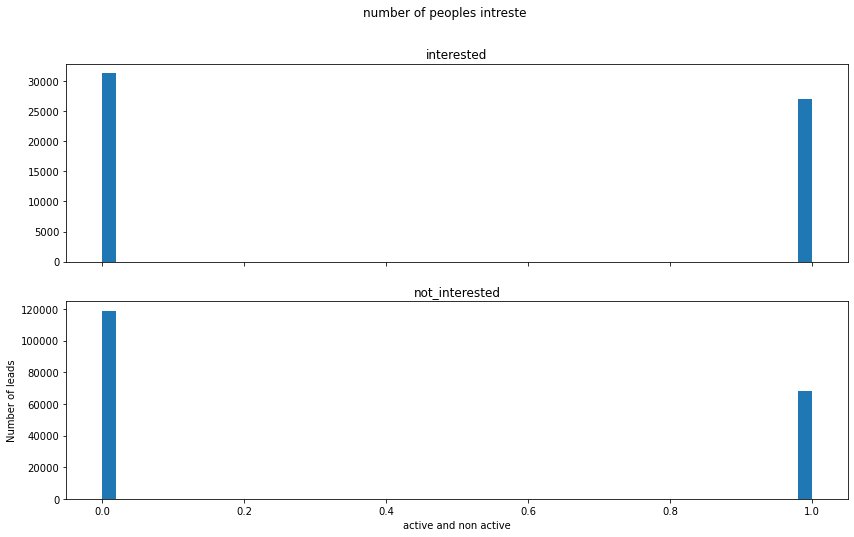

In [41]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('number of peoples intreste')
bins = 50
ax1.hist(interested.Is_Active, bins = bins)
ax1.set_title('interested')
ax2.hist(not_interested.Is_Active, bins = bins)
ax2.set_title('not_interested')
plt.xlabel('active and non active')
plt.ylabel('Number of leads')
plt.show();

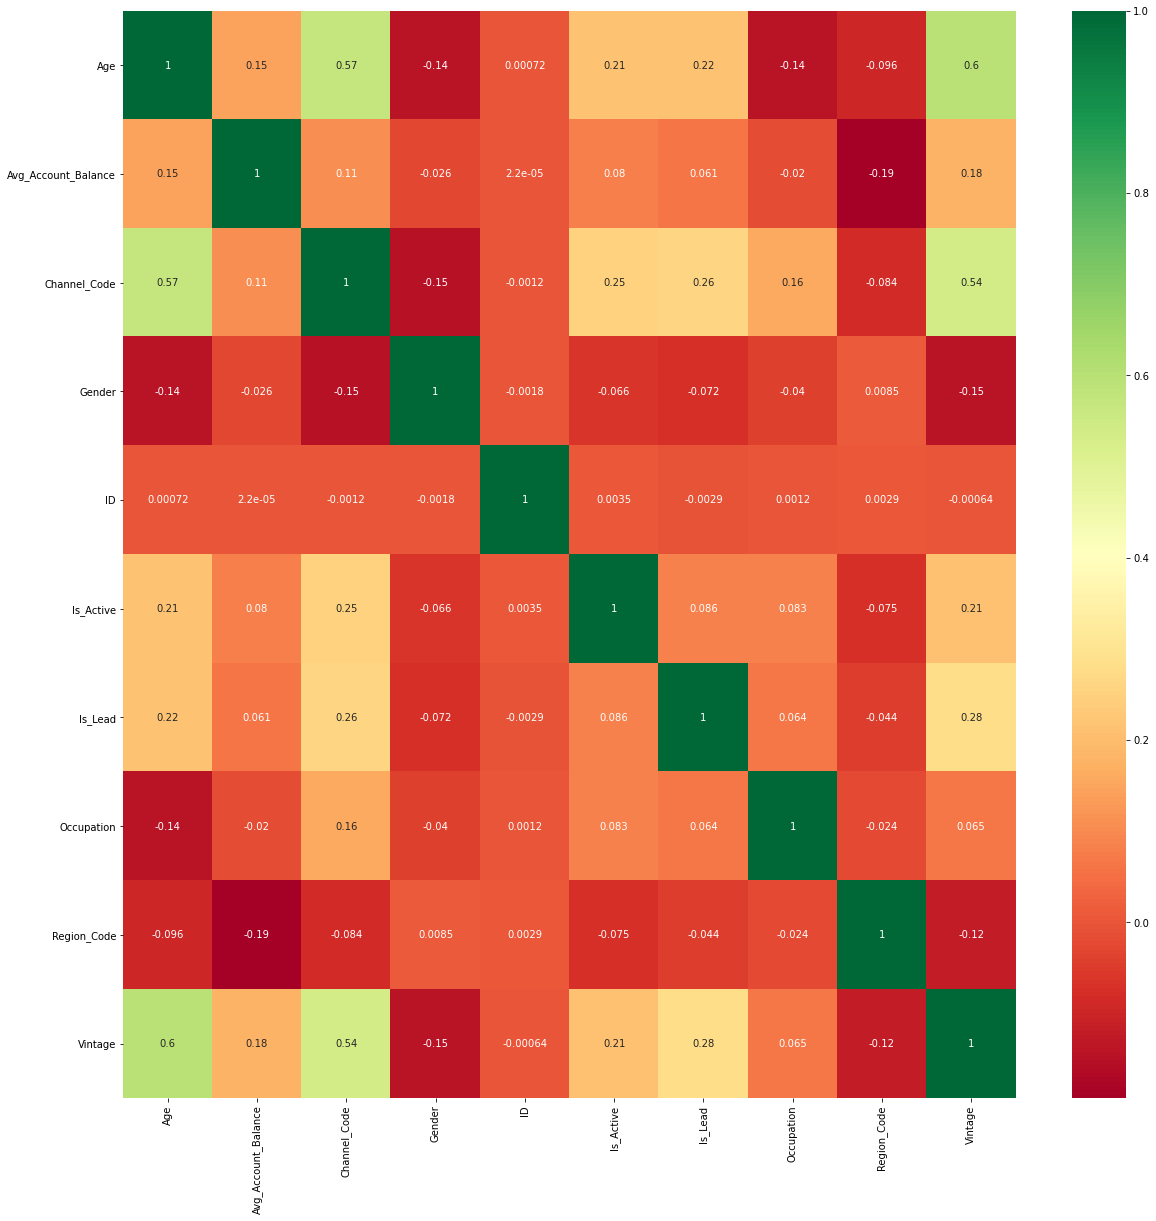

In [42]:
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
train = pd.DataFrame(data[:245725:])
test = pd.DataFrame(data[245725::])

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  105312 non-null  int64  
 1   Avg_Account_Balance  105312 non-null  int32  
 2   Channel_Code         105312 non-null  int64  
 3   Gender               105312 non-null  int64  
 4   ID                   105312 non-null  int64  
 5   Is_Active            105312 non-null  int64  
 6   Is_Lead              0 non-null       float64
 7   Occupation           105312 non-null  int64  
 8   Region_Code          105312 non-null  int64  
 9   Vintage              105312 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 8.4 MB


In [45]:
test.drop("Is_Lead",axis=1,inplace=True)
test.head()

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Occupation,Region_Code,Vintage
0,1,0,0,0,245725,0,0,7,25
1,2,0,1,0,245726,0,0,0,49
2,1,0,0,0,245727,0,1,2,14
3,1,0,0,0,245728,0,0,24,33
4,1,0,0,1,245729,0,0,2,19


In [46]:
train.head()

,Age,Avg_Account_Balance,Channel_Code,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,3,1,2,1,0,0,0.0,0,0,43
1,1,0,0,1,1,0,0.0,1,1,32
2,2,1,2,1,2,1,0.0,2,0,26
3,1,0,0,0,3,0,0.0,1,2,19
4,1,0,0,1,4,0,0.0,1,3,33


In [47]:
train['ID'].value_counts()

2047     1
39494    1
14930    1
8785     1
10832    1
        ..
9646     1
15789    1
13740    1
3499     1
0        1
Name: ID, Length: 245725, dtype: int64

In [48]:
X=train.drop("Is_Lead",axis=1)
y=train['Is_Lead']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(shuffle=True, random_state=42, n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 70,
 bootstrap= True)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=400)

In [52]:
pred_1=rfc.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred_1))
print(confusion_matrix(y_test,pred_1))

0.7826585925672706
[[59105  3133]
 [14669  5001]]


In [54]:
from sklearn.metrics import classification_report,accuracy_score
Cr = classification_report(y_test,pred_1,digits=2)

In [55]:
print(Cr)

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     62238
         1.0       0.61      0.25      0.36     19670

    accuracy                           0.78     81908
   macro avg       0.71      0.60      0.61     81908
weighted avg       0.76      0.78      0.75     81908



In [56]:
predicting=rfc.predict(test).astype(int)

In [57]:
t = pd.read_csv('test_mSzZ8RL.csv')
t.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [58]:
submission=pd.DataFrame({"ID":t['ID'],"Is_Lead":predicting})

In [59]:
print(submission)

              ID  Is_Lead
0       VBENBARO        0
1       CCMEWNKY        0
2       VK3KGA9M        0
3       TT8RPZVC        0
4       SHQZEYTZ        0
...          ...      ...
105307  DBENJOYI        1
105308  CWQ72DWS        0
105309  HDESC8GU        0
105310  2PW4SFCA        0
105311  F2NOYPPZ        0

[105312 rows x 2 columns]


In [61]:
submission.to_csv("submissionfile.csv",index=False)

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier(learning_rate=0.001,n_estimators=2500,
                                max_depth=4, min_child_weight=0,
                                gamma=0, subsample=0.7,
                                colsample_bytree=0.7,
                                scale_pos_weight=1, seed=27,
                                reg_alpha=0.00006)
xgb.fit(X_train,y_train)
predict_12=xgb.predict(X_test)
print(confusion_matrix(y_test,predict_12))